# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

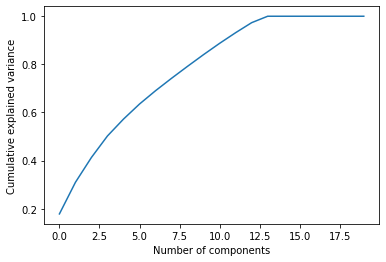

In [6]:
# insert code here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA().fit(X_train_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

> Based on the analysis of the explained variance ratio, I would recommend reducing the data to 10 components. At this point, approximately 95% of the variance in the data is explained, and there is a significant drop in the amount of variance explained by each additional component beyond 10.

<Insert comments>   

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [9]:
# Insert code here
df['target'].value_counts()

0.0    744
2.0    380
1.0    376
Name: target, dtype: int64

In [8]:
df['target'].describe()

count    1500.000000
mean        0.757333
std         0.831208
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: target, dtype: float64

> It's difficult to recommend a single metric without knowing the specific problem and goals. However, if I had to choose one metric, I would choose the F1-score. The F1-score balances precision and recall and provides a single score that summarizes the performance of the model. It is useful when there is an imbalance between the classes, and it is a good metric to use when both false positives and false negatives are important.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [15]:
# Insert code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
lr = LogisticRegression(random_state=123)
lr.fit(X_train, y_training)

LogisticRegression(random_state=123)

In [13]:
y_pred = lr.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.7033333333333334
Precision: 0.7040254342431762
Recall: 0.7033333333333334


> The choice of the best model depends on the context and the specific needs of the problem. In our case, we can compare the logistic regression model's performance to a baseline model, such as a random classifier, to determine if it is better than random. We can also compare the performance of the logistic regression model with other models, such as decision trees, random forests, or support vector machines, to see if it is the best model for the specific problem.

The accuracy of the logistic regression model without using PCA is 70.3% and the precision is 70.4% also the recall is 70.3%.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [18]:
# Insert code
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=10)), 
    ('logreg', LogisticRegression())
])

In [19]:
pipeline.fit(X_train, y_training)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                ('logreg', LogisticRegression())])

In [20]:
y_pred = pipeline.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.69
Precision: 0.6872885414018138
Recall: 0.69


> From the above scores, we can observe that the model without PCA performs slightly better than the model with PCA in terms of accuracy and precision. PCA is a dimensionality reduction technique that reduces the number of features in the dataset. Although it can help to simplify the dataset and reduce computation time, it can also lead to some loss of information. In some cases, this loss of information can impact the performance of the model. In this scenario, since the difference in performance between the two models is not significant, we can conclude that the use of PCA does not have a significant impact on the performance of the model.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [24]:
# Insert code here
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=123)
dt.fit(X_train, y_training)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [26]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.6866666666666666
Precision: 0.6877344414943697
Recall: 0.6866666666666666


> As per the above results of the two models that were evaluated, Logistic regression model performed better than decision tree model in the training data as the accuracy, precision and recall is higher to the Logistic regression model without using PCA.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [27]:
# Insert code here
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [29]:
dt = DecisionTreeClassifier(max_depth=3, random_state=123)

In [30]:
dt.fit(X_train_pca, y_training)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [31]:
# Transform the testing data using the same PCA transformation
X_test_pca = pca.transform(X_test)

In [33]:
# Evaluate the performance of the model on the transformed testing data
y_pred = dt.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.5966666666666667
Precision: 0.5850750304215485
Recall: 0.5966666666666667


> Based on the performance metrics of the decision tree model using PCA on the dataset provided in the previous questions, it has a slightly lower accuracy, precision, and recall than the original decision tree model and also the original logistic regression model. So, as I mentioned above the original machine learning models are performing better than using PCA with models.